In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn import utils
from sklearn import preprocessing


In [58]:
X= pd.read_csv('data/train.csv')
X=X.drop(X.columns[0],axis=1)
X

,Open
0,0.049579
1,0.049895
2,0.043579
3,0.036526
4,0.041368
...,...
1814,0.421368
1815,0.421263
1816,0.410316
1817,0.410632


In [59]:
# Load time series data


# Define hyperparameter grid

window_size=3
# Define sliding window function
def sliding_window(X, window_size):
    X_windows = []
    y=[]
    for i in range(len(X)-window_size):
        X_windows.append(X[i:i+window_size])
        y.append(X[i+window_size])
    return np.array(X_windows),np.array(y)

# Apply sliding window approach to training data


In [67]:
from sklearn.svm import SVR
import itertools

best_error = float('inf')
final_params = {}
final_window_size = None
mse_scores=[]
# Define the parameter combinations to try
C_values = [0.1, 1,5, 10, 100]
gamma_values = [1, 0.1, 0.01, 0.001]
kernel_values = ['rbf', 'linear']

param_combinations = list(itertools.product(C_values, gamma_values, kernel_values))

for window_size in range(1, 11):
    X_windows, y = sliding_window(X['Open'], window_size)
    X_train = pd.DataFrame(X_windows.reshape(-1, window_size))
    
    for C, gamma, kernel in param_combinations:
        model = SVR(C=C, gamma=gamma, kernel=kernel)
        model.fit(X_train, y)
        
        # Evaluate model
        predictions = model.predict(X_train)
        error = mean_squared_error(y, predictions)
        
        if error < best_error:
            best_error = error
            final_window_size = window_size
            final_params = {'C': C, 'gamma': gamma, 'kernel': kernel}

    mse_scores.append(error)
# Train final model
X_windows, y = sliding_window(X['Open'], final_window_size)
X_train = pd.DataFrame(X_windows.reshape(-1, final_window_size))
final_model = SVR(**final_params)
final_model.fit(X_train, y)

print("Best window size:", final_window_size)
print("Best hyperparameters:", final_params)
print("Best error:", best_error)


Best window size: 10
Best hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best error: 0.0008294962216616929


In [68]:
test_data=pd.read_csv('data/val.csv')
test_data

,Unnamed: 0,Open
0,1819,0.396632
1,1820,0.398211
2,1821,0.391579
3,1822,0.390632
4,1823,0.400737
...,...,...
385,2204,0.514947
386,2205,0.509263
387,2206,0.505895
388,2207,0.511158


In [69]:
test_X_windows,y_test = sliding_window(test_data['Open'], final_window_size)
test_X_windows = pd.DataFrame(test_X_windows.reshape(-1,final_window_size))
test_X_windows
print(y_test)

[0.392      0.39757895 0.39873684 0.40115789 0.41084211 0.40757895
 0.41936842 0.42021053 0.41136842 0.422      0.42421053 0.41821053
 0.42652632 0.42452632 0.428      0.42589474 0.42915789 0.42684211
 0.42631579 0.42431579 0.436      0.44642105 0.43989474 0.43105263
 0.43463158 0.44536842 0.42768421 0.41915789 0.43231579 0.43315789
 0.46726316 0.47431579 0.47136842 0.46157895 0.46957895 0.47410526
 0.48010526 0.47905263 0.51936842 0.48684211 0.49189474 0.48863158
 0.48368421 0.48052632 0.46915789 0.45978947 0.44852632 0.45273684
 0.47052632 0.46052632 0.46884211 0.46378947 0.45968421 0.46915789
 0.46178947 0.44778947 0.44821053 0.46010526 0.45726316 0.45126316
 0.44536842 0.444      0.45063158 0.45452632 0.45778947 0.45021053
 0.44978947 0.46368421 0.48210526 0.47905263 0.48368421 0.47389474
 0.47484211 0.46884211 0.46347368 0.46778947 0.44168421 0.45294737
 0.45505263 0.45273684 0.44768421 0.43705263 0.44284211 0.44263158
 0.43431579 0.45231579 0.44810526 0.45652632 0.45231579 0.4453

In [70]:
test_y_pred = final_model.predict(test_X_windows)
test_y_pred.shape,y_test.shape

((380,), (380,))

In [71]:

# Apply sliding window approach to test data

# Predict on test data


# Evaluate performance
test_y_pred = test_y_pred.flatten()
y_test = y_test.flatten()
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.003934102702427225


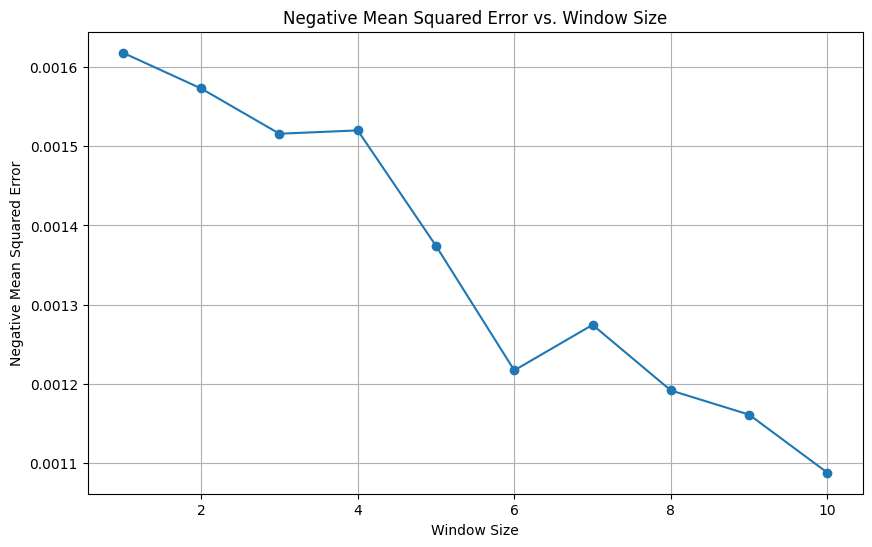

In [72]:
import matplotlib.pyplot as plt
window_sizes = list(range(1, 11))
plt.figure(figsize=(10, 6))
plt.plot(window_sizes,mse_scores, marker='o')
plt.title('Negative Mean Squared Error vs. Window Size')
plt.xlabel('Window Size')
plt.ylabel('Negative Mean Squared Error')
plt.grid(True)
plt.show()

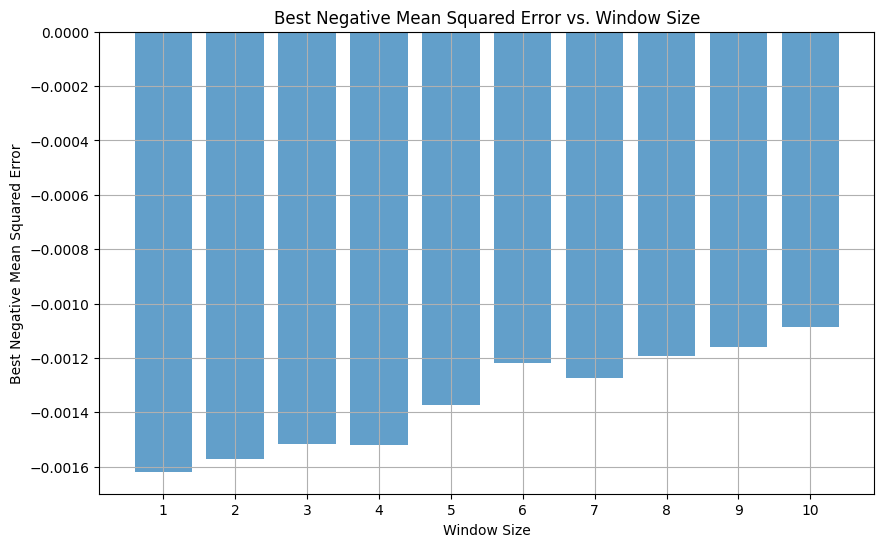

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(window_sizes, [-mse for mse in mse_scores], align='center', alpha=0.7)
plt.title('Best Negative Mean Squared Error vs. Window Size')
plt.xlabel('Window Size')
plt.ylabel('Best Negative Mean Squared Error')
plt.xticks(window_sizes)
plt.grid(True)
plt.show()